In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [4]:
!pwd

/home/tridi/Machine Learning/Dicoding


In [7]:
# Mengunduh data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O ./datasets/tmp/messy_vs_clean_room.zip

--2021-07-25 14:11:25--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘./datasets/tmp/messy_vs_clean_room.zip’

./datasets/tmp/mess 100%[===================>]  67,13M   302KB/s    in 2m 55s  

2021-07-25 14:14:21 (393 KB/s) - ‘./datasets/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [14]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = './datasets/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = './datasets/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [16]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [17]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [11]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')
 
# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [19]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [22]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 0.7291 - accuracy: 0.5300 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 4s - loss: 0.6965 - accuracy: 0.5300 - val_loss: 0.6576 - val_accuracy: 0.8000
Epoch 3/20
25/25 - 5s - loss: 0.6557 - accuracy: 0.6800 - val_loss: 0.5794 - val_accuracy: 0.7000
Epoch 4/20
25/25 - 4s - loss: 0.7133 - accuracy: 0.5800 - val_loss: 0.6207 - val_accuracy: 0.6000
Epoch 5/20
25/25 - 4s - loss: 0.5988 - accuracy: 0.6900 - val_loss: 0.5997 - val_accuracy: 0.8500
Epoch 6/20
25/25 - 4s - loss: 0.6742 - accuracy: 0.6600 - val_loss: 0.6850 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 5s - loss: 0.6666 - accuracy: 0.6800 - val_loss: 0.6119 - val_accuracy: 0.8000
Epoch 8/20
25/25 - 4s - loss: 0.6014 - accuracy: 0.6500 - val_loss: 0.4647 - val_accuracy: 0.7500
Epoch 9/20
25/25 - 4s - loss: 0.5688 - accuracy: 0.7100 - val_loss: 0.5072 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 5s - loss: 0.6642 - accuracy: 0.7300 - val_loss: 0.5356 - val_accuracy: 0.8000
Epoch 11/20
25/25 -

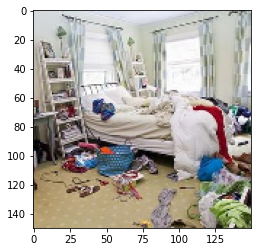

In [37]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
# change it to your filename
fn = './datasets/tmp/images/val/messy/9.png'
 
# predicting images
path = fn
img = image.load_img(path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [39]:
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
  
print(fn)
if classes==0:
    print('clean')
else:
    print('messy')

./datasets/tmp/images/val/messy/9.png
messy
